## 题 2

#### 一、 导入模块

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn.metrics import adjusted_rand_score

#### 二、 数据集 —— 平面上多点的坐标

In [2]:
data=np.array([
    [-3, -3],
    [ 3, -3],
    [ 3,  3],
    [-3,  3],
    [-2, -3],
    [ 3,  1],
    [ 1,  3],
    [-3, -2]
])

#### 三、 散点图

Text(0, 0.5, 'y')

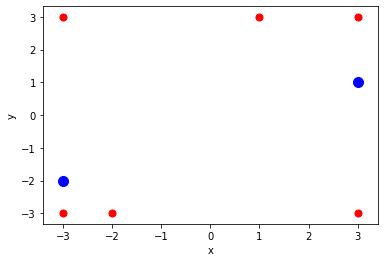

In [3]:
plt.scatter(data[[0,1,2,3,4,6],0], data[[0,1,2,3,4,6],1], s=50, c='red')
plt.scatter(data[[5,7],0], data[[5,7],1], s=100, c='blue')
plt.xlabel("x")
plt.ylabel("y")

#### 四、 K-平均聚类分析


- 聚类数 2
    - 参数 `n_clusters=2`
- 初始聚类中心取图中 2 个蓝色点
    - 参数 `init=np.array([[-3,-2],[3, 1]])`

In [4]:
kmeans_1 = cluster.KMeans(n_clusters=2, init=np.array([[-3,-2],[3, 1]]), n_init=1)

#### 五、 以下请你完成


1. 对数组 data 进行聚类分析

In [5]:
## 对数组 data 进行聚类分析代码
kmeans_1.fit(data)

KMeans(init=array([[-3, -2],
       [ 3,  1]]), n_clusters=2, n_init=1)

2. 查看 kmeans_1 对象的属性，指出并提取
    - 聚类标记数组
    - 聚类中心数组

In [7]:
## 查看 kmeans_1 对象的属性
dir(kmeans_1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict'

In [8]:
## 提取有用信息 —— 聚类标记数组

kmeans_1.labels_

array([0, 1, 1, 0, 0, 1, 1, 0])

In [6]:
## 提取有用信息 —— 聚类中心数组

kmeans_1.cluster_centers_

array([[-2.75, -1.25],
       [ 2.5 ,  1.  ]])

3. 画出聚类结果散点图
    - 用红蓝色的小圆点标记区分聚类
    - 用黑色圆点标记聚类中心

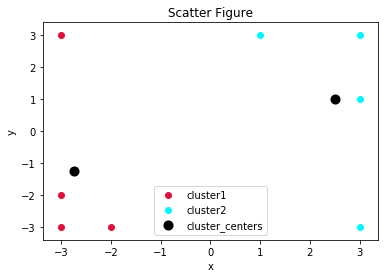

In [39]:
## 画出聚类结果散点图
from collections import OrderedDict
import matplotlib.pyplot as plt
color_list=['#DC143C','#00F8FF']
label_list=['cluster1','cluster2']
def scatter_cluster(kmeans):
    for i in range(len(kmeans.labels_)):
        plt.scatter(data[i][0], 
                    data[i][1],
                    color=color_list[kmeans.labels_[i]],
                    label=label_list[kmeans.labels_[i]])
    for j in range(len(kmeans.cluster_centers_)):
        plt.scatter(kmeans.cluster_centers_[j][0], 
                    kmeans.cluster_centers_[j][1],
                   marker='o',s=50,linewidths=3,
                   color='black',label='cluster_centers')
    plt.xlabel('x')
    plt.ylabel('y')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),loc=8)
    plt.title('Scatter Figure')
scatter_cluster(kmeans_1)

4. 预测类别
    - 根据聚类结果，预测坐标为 (0,0)、(0,-1) 和 (0,1) 的三个点的类别

In [14]:
## 预测类别
data_pred=np.array([
    [0, 0],
    [0,-1],
    [0, 1]
])
pred = kmeans_1.predict(data_pred)
pred

array([1, 0, 1])

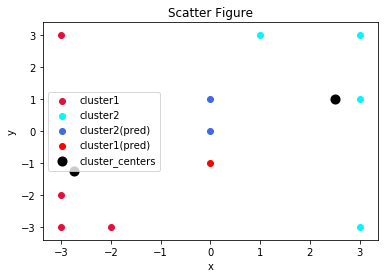

In [28]:
color_list=['#DC143C','#00F8FF']
color_list2=['red','royalblue']
label_list=['cluster1','cluster2']
label_list2=['cluster1(pred)','cluster2(pred)']
for i in range(len(kmeans_1.labels_)):
    plt.scatter(data[i][0], 
                data[i][1],
                color=color_list[kmeans_1.labels_[i]],
               label=label_list[kmeans_1.labels_[i]])
for k in range(len(pred)):
    plt.scatter(data_pred[k][0], 
                data_pred[k][1],
                color=color_list2[pred[k]],
               label=label_list2[pred[k]])
for j in range(len(kmeans_1.cluster_centers_)):
    plt.scatter(kmeans_1.cluster_centers_[j][0], 
                kmeans_1.cluster_centers_[j][1],
               marker='o',s=50,linewidths=3,
               color='black',label='cluster_centers')
plt.xlabel('x')
plt.ylabel('y')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('Scatter Figure');

5. 修改初始聚类中心，取为 init=np.array([[-2,-3],[1, 3]])，再
    - 完成聚类分析
    - 提取聚类标记数组 `labels_2`
    - 计算两次聚类标记数组的 `Adjusted Rand Index`

In [29]:
## 修改初始聚类中心，再分析
kmeans_2 = cluster.KMeans(n_clusters=2,  init=np.array([[-2,-3],[1, 3]]), n_init=1)
kmeans_2.fit(data)

KMeans(init=array([[-2, -3],
       [ 1,  3]]), n_clusters=2, n_init=1)

In [31]:
## 提取聚类标记数组
labels_2=kmeans_2.labels_
labels_2

array([0, 0, 1, 1, 0, 1, 1, 0])

In [34]:
labels_1=kmeans_1.labels_
labels_1

array([0, 1, 1, 0, 0, 1, 1, 0])

In [35]:
## 计算 Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_1, labels_2)

0.125

- 共有两个分类标记不同
- 可见初始聚类中心的设置对于分类是有影响的

#### 观察一下两种不同的分类

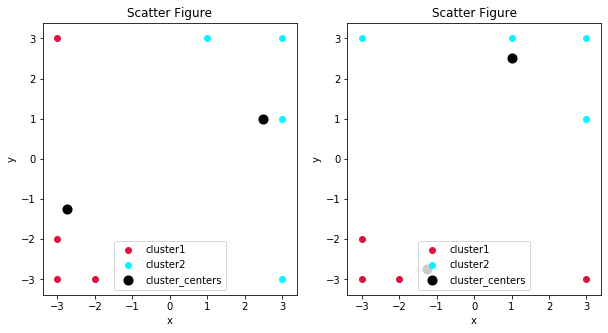

In [50]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,5)
plt.subplot(121)
scatter_cluster(kmeans_1)
plt.subplot(122)
scatter_cluster(kmeans_2)

#### 题目结束